First load the necessary libraries:

In [1]:
import miditapyr as mt
import mido

Then load the [midi file included in this repository](https://github.com/urswilke/miditapyr/raw/master/notebooks/test_midi_file.mid):

In [2]:
mid_file_str = 'test_midi_file.mid'
mido_mid_file = mido.MidiFile(mid_file_str)

Here you can listen to the midi file converted to mp3:

In [3]:
import IPython
IPython.display.Audio(url = "https://raw.githubusercontent.com/urswilke/miditapyr/master/notebooks/test_mp3_file.mp3")

Now the midi data can be loaded in a dataframe `dfc` and an integer `ticks_per_beat`:

In [4]:
dfc = mt.midi_to_df(mido_mid_file)
ticks_per_beat = mido_mid_file.ticks_per_beat


In [5]:
dfc

,i_track,meta,msg
0,0,True,"{'type': 'track_name', 'name': 'drum-t1-1-t1',..."
1,0,True,"{'type': 'instrument_name', 'name': 'drum-t1-1..."
2,0,True,"{'type': 'channel_prefix', 'channel': 10, 'tim..."
3,0,True,"{'type': 'set_tempo', 'tempo': 666667, 'time': 0}"
4,0,True,"{'type': 'time_signature', 'numerator': 4, 'de..."
...,...,...,...
274,2,False,"{'type': 'note_on', 'time': 0, 'note': 65, 've..."
275,2,False,"{'type': 'note_off', 'time': 0, 'note': 57, 'v..."
276,2,False,"{'type': 'note_off', 'time': 0, 'note': 62, 'v..."
277,2,False,"{'type': 'note_off', 'time': 0, 'note': 65, 'v..."


In [6]:
df = mt.tidy_df(dfc)
# df['name'] = df['name'].fillna('')
df

,i_track,meta,type,name,time,channel,tempo,numerator,denominator,clocks_per_click,notated_32nd_notes_per_beat,note,velocity,program
0,0,True,track_name,drum-t1-1-t1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,True,instrument_name,drum-t1-1-t1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,True,channel_prefix,NaN,0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,True,set_tempo,NaN,0,NaN,666667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,True,time_signature,NaN,0,NaN,NaN,4.0,4.0,24.0,8.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,2,False,note_on,NaN,0,15.0,NaN,NaN,NaN,NaN,NaN,65.0,65.0,NaN
275,2,False,note_off,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,57.0,64.0,NaN
276,2,False,note_off,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,62.0,64.0,NaN
277,2,False,note_off,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,65.0,64.0,NaN


In [7]:
ticks_per_beat

19200

In order to use the R package [pyramidi](https://github.com/urswilke/pyramidi) (via the cell magic **%%R**), the python package rpy2 needs to be used:

In [8]:
%load_ext rpy2.ipython 

Now we are ready to run R code:

In [9]:
%%R -i df -i ticks_per_beat
suppressMessages(library(tidyverse))
dfm <- pyramidi::tab_measures(df, ticks_per_beat)
# dfm

The following code imports the dataframe `dfm` back to python:

In [10]:
# import pandas
from rpy2.robjects import pandas2ri, r

pandas2ri.activate()
dfm = r['dfm']

dfm['meta'] = dfm['meta'].astype(bool)
# dfm['name'] = df['name']

dfm

,i_track,meta,type,name,time,channel,tempo,numerator,denominator,clocks_per_click,notated_32nd_notes_per_beat,note,velocity,program,ticks,t,m,b,i_note
1,0,True,track_name,drum-t1-1-t1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,0.0,0.0,0
2,0,True,instrument_name,drum-t1-1-t1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,0.0,0.0,0
3,0,True,channel_prefix,NA_character_,0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,0.0,0.0,0
4,0,True,set_tempo,NA_character_,0,NaN,666667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000,0.0,0.0,0
5,0,True,time_signature,NA_character_,0,NaN,NaN,4.0,4.0,24.0,8.0,NaN,NaN,NaN,0,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2,False,note_on,NA_character_,0,15.0,NaN,NaN,NaN,NaN,NaN,65.0,65.0,NaN,614400,21.333344,32.0,128.0,10
276,2,False,note_off,NA_character_,0,0.0,NaN,NaN,NaN,NaN,NaN,57.0,64.0,NaN,614400,21.333344,32.0,128.0,10
277,2,False,note_off,NA_character_,0,0.0,NaN,NaN,NaN,NaN,NaN,62.0,64.0,NaN,614400,21.333344,32.0,128.0,13
278,2,False,note_off,NA_character_,0,0.0,NaN,NaN,NaN,NaN,NaN,65.0,64.0,NaN,614400,21.333344,32.0,128.0,10


In [11]:
# df_meta, df_notes = mt.split_df(dfm.drop(['name', 'key']))
df_meta, df_notes = mt.split_df(dfm)
# df_meta = dfm.query('meta == 1').dropna(how = 'all', axis = 1)
# df_notes = dfm.query('meta == 0').dropna(how = 'all', axis = 1)

Joining, by = "note"


/home/chief/anaconda3/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:60: UserWarning: Error while trying to convert the column "name". Fall back to string conversion. The error is: <class 'rpy2.rinterface_lib.sexp.NACharacterType'>
  warnings.warn('Error while trying to convert '
/home/chief/anaconda3/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:60: UserWarning: Error while trying to convert the column "name". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'str'> and <class 'rpy2.rinterface_lib.sexp.NACharacterType'>).
  warnings.warn('Error while trying to convert '


Joining, by = c("i_track", "channel", "i_note", "type", "m", "b", "t", "ticks", "time", "meta")
Joining, by = c("i_track", "channel", "note", "i_note", "type", "m", "b", "t", "ticks", "time", "velocity", "meta", "name")


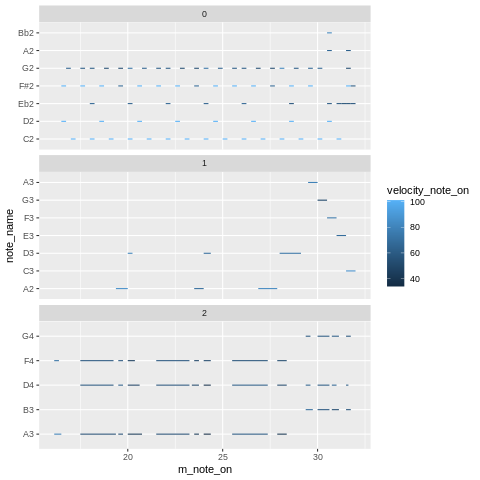

In [20]:
%%R -i df_notes -i df_meta -i df
df_not_notes <- 
  df_notes %>% 
  dplyr::filter(!stringr::str_detect(.data$type, "^note_o[nf]f?$")) 

df_notes_wide <-
  df_notes %>% 
  dplyr::filter(stringr::str_detect(.data$type, "^note_o[nf]f?$")) %>%
  # tab_measures(df_meta, df_notes, ticks_per_beat) %>%
  pyramidi::widen_events() %>%
  left_join(pyramidi::midi_defs)
# df_notes_wide %>% as_tibble()


p1 <- df_notes_wide %>%
  ggplot() +
  geom_segment(
    aes(
      x = m_note_on,
      y = note_name,
      xend = m_note_off,
      yend = note_name,
      color = velocity_note_on
    )
  ) +
  # each midi track is printed into its own facet:
  facet_wrap( ~ i_track,
              ncol = 1,
              scales = "free_y")
# p1

df_notes_out <-
  df_notes_wide %>%
  select(c("i_track", 
           # "name", 
           "channel", "note", "i_note"), matches("_note_o[nf]f?$")) %>%
  pivot_longer(matches("_note_o[nf]f?$"),
               names_to = c(".value", "type"),
               names_pattern = "(.+?)_(.*)") %>% 
  mutate(meta = FALSE) 


df_notes_out <-
  df_notes_out %>%
  full_join(df_meta) %>% 
  full_join(df_not_notes) %>%
  arrange(i_track, ticks) %>% 
  group_by(i_track) %>%
  mutate(time = ticks - lag(ticks) %>% {.[1] = 0; .}) %>%
  ungroup()

# df_notes_out



df2 <- 
  df_notes_out %>% 
  select(names(df)) %>% 
  # mutate_if(is_numeric, as.integer) %>% 
  mutate_if(is.numeric, ~ifelse(is.na(.), NaN, .))

p1

We can also visualize a piano roll of the midi data in `df_notes_wide` with altair:

In [21]:
df_notes_wide = r['df_notes_wide']
import altair as alt

alt.Chart(df_notes_wide).mark_bar().encode(
    x='m_note_on:T',
    x2='m_note_off:T',
    y='note:N',
    color='velocity_note_on:Q',
    tooltip=['m_note_on', 'm_note_off', 'note']
).properties(
    width=200,
    height=200
).facet(
    facet='i_track:O',
    columns=1
).resolve_scale(
    y='independent'
).interactive()


alt.FacetChart(...)

In [14]:
import numpy as np
df2 = r['df2']
df2['meta'] = df2['meta'].astype(bool)


# df2['name'] = df2['name'].replace(NA_character_, np.nan)
df2

,i_track,meta,type,name,time,channel,tempo,numerator,denominator,clocks_per_click,notated_32nd_notes_per_beat,note,velocity,program
1,0,True,track_name,drum-t1-1-t1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,True,instrument_name,drum-t1-1-t1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,True,channel_prefix,NA_character_,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,True,set_tempo,NA_character_,0.0,NaN,666667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,True,time_signature,NA_character_,0.0,NaN,NaN,4.0,4.0,24.0,8.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,2,False,note_off,NA_character_,NaN,15.0,NaN,NaN,NaN,NaN,NaN,65.0,NaN,NaN
289,2,False,note_on,NA_character_,NaN,15.0,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN
290,2,False,note_on,NA_character_,NaN,0.0,NaN,NaN,NaN,NaN,NaN,57.0,NaN,NaN
291,2,False,note_on,NA_character_,NaN,0.0,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN


In [15]:
# df2.replace(r'^\s*$', np.nan, regex=True, inplace = True)
df2['name'] = df2['name'].apply(str).replace("NA_character_", np.nan)

In [16]:
import pandas as pd
def compact_df(df, repair_reticulate_conversion = False):
    """
    Function to transform the dataframe returned by tidy_df() back to a format
    as in the result of midi_to_df()
    :param df: Dataframe returned by tidy_df()
    :type dfc: pandas.DataFrame
    :param repair_reticulate_conversion: Should floats be converted to integer
    :type repair_reticulate_conversion: boolean

    :return: a dataframe, containing 3 columns:
    i_track: the track number
    msg: the meta / note information read by mido.MidiFile() in a list of dictionaries
    meta: whether the event in 'msg' is a mido meta event
    :rtype: pandas.DataFrame
    """
    dict_list = [v.dropna().to_dict() for k,v in df.drop(columns=['i_track', 'meta']).iterrows()]
    # This is necessary because conversion the R package reticulate that
    # converts dataframes from pandas to R converts integers to R numeric types.
    # When converting back to pandas this would cause an error in mido when
    # calling df_to_midi() on the result of this function...
    if repair_reticulate_conversion == True:
        for dicts in dict_list:
            for key, value in dicts.items():
                if type(value) == float:
                    dicts[key] = int(value)

    df_events = pd.DataFrame()
    df_events['msg'] = dict_list
    dfc2 = pd.concat([df[['i_track', 'meta']].reset_index(drop=True),
                      df_events
                     ],
                     axis = 1)
    return dfc2
dfc2 = mt.compact_df(df2, repair_reticulate_conversion = True)#.dropna(subset=['msg'])
dfc2


,i_track,meta,msg
0,0,True,"{'type': 'track_name', 'name': 'drum-t1-1-t1',..."
1,0,True,"{'type': 'instrument_name', 'name': 'drum-t1-1..."
2,0,True,"{'type': 'channel_prefix', 'time': 0, 'channel..."
3,0,True,"{'type': 'set_tempo', 'time': 0, 'tempo': 666667}"
4,0,True,"{'type': 'time_signature', 'time': 0, 'numerat..."
...,...,...,...
287,2,False,"{'type': 'note_off', 'channel': 15, 'note': 65}"
288,2,False,"{'type': 'note_on', 'channel': 15, 'note': 62}"
289,2,False,"{'type': 'note_on', 'channel': 0, 'note': 57}"
290,2,False,"{'type': 'note_on', 'channel': 0, 'note': 62}"


In [17]:
dfc.eq(dfc2)#.all(axis=1)#.all()
# dfc2

,i_track,meta,msg
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
...,...,...,...
287,False,False,False
288,False,False,False
289,False,False,False
290,False,False,False


Uncomment this command to save the midi data back to a file:

In [18]:
# mt.df_to_midi(dfc2,
#               ticks_per_beat,
#               "test.mid")

In [19]:
#mt.df_2_midi(df_meta, df_notes, ticks_per_beat, "test.mid")